<a href="https://colab.research.google.com/github/gzanellato-ia/burrowing_parrot/blob/main/burrowing_parrots_ResUNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?export=view&id=1CHoxaz7sslroSHaP8IINZtgp6yuVrKZM' width=200 align='right'>

#**Automatic counting of Burrowing Parrot nests**
##Parrot colony in El Cóndor
##Río Negro Province, Argentina

<img src='https://drive.google.com/uc?export=view&id=1YeDCnNV4zKYsjiz_x08wCWAOPH3NaxxV' width=200 align='right'>

##### Gabriel Zanellato - Juan Masello - Gabriel Pagnossin

#### Marzo 2022

<img src='https://drive.google.com/uc?export=view&id=14Qs7erhsP5T1V8KGpsfxEZuKFMnjHRVX' width=300>


## Implementation of the Residual U-Net architecture

Ref: https://github.com/nikhilroxtomar/Deep-Residual-Unet/blob/master/Deep%20Residual%20UNet.ipynb

Paper: https://arxiv.org/pdf/1711.10684.pdf


In [ ]:
# Copyright: Gabriel Zanellato, 2022
# Based on Lempitsky (2010), Fiaschi (2012), Xie(2018), Ronneberger (2015), Waithe (2017), Zhang et al. (2017)

from google.colab import drive
drive.mount('/content/drive/')

BASE_FOLDER = '/content/drive/My Drive/Data_loros/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.model_selection import train_test_split
import os

## Importing the images containing the nests and the points marked by the expert

In [ ]:
lista_carpetas = ['parches', 'puntos']

nombres_imagenes  = os.listdir(BASE_FOLDER + '/' + lista_carpetas[0])
nombres_puntos    = os.listdir(BASE_FOLDER + '/' + lista_carpetas[1])

print(lista_carpetas[0])
print(nombres_imagenes)
print('')
print(lista_carpetas[1])
print(nombres_puntos)


# Shuffling
import random

random.seed(0)
random.shuffle(nombres_imagenes)

print("\nshuffled images")
print(nombres_imagenes)

parches
['parche_001.png', 'parche_002.png', 'parche_008.png', 'parche_004.png', 'parche_011.png', 'parche_007.png', 'parche_013.png', 'parche_005.png', 'parche_012.png', 'parche_009.png', 'parche_003.png', 'parche_006.png', 'parche_014.png', 'parche_010.png', 'parche_017.png', 'parche_020.png', 'parche_016.png', 'parche_018.png', 'parche_021.png', 'parche_015.png', 'parche_019.png', 'parche_023.png', 'parche_026.png', 'parche_025.png', 'parche_024.png', 'parche_022.png', 'parche_027.png', 'parche_029.png', 'parche_034.png', 'parche_032.png', 'parche_030.png', 'parche_031.png', 'parche_036.png', 'parche_035.png', 'parche_033.png', 'parche_028.png', 'parche_037.png', 'parche_041.png', 'parche_040.png', 'parche_044.png', 'parche_042.png', 'parche_043.png', 'parche_038.png', 'parche_039.png', 'parche_046.png', 'parche_045.png', 'parche_047.png', 'parche_050.png', 'parche_052.png', 'parche_054.png', 'parche_056.png', 'parche_055.png', 'parche_053.png', 'parche_051.png', 'parche_049.png', '

In [ ]:
# Importing the images

imagen = []
puntos = []

qty = len(nombres_imagenes)

for i in range(qty):

    print('Importing image #', i+1, 'of', str(qty))
    imagen.append(io.imread(BASE_FOLDER + '/' + lista_carpetas[0] + '/' + nombres_imagenes[i]))
    puntos.append(io.imread(BASE_FOLDER + '/' + lista_carpetas[1] + '/' + nombres_imagenes[i]))

imagen = np.array(imagen)/255.
puntos = np.array(puntos)/255.

print(imagen.shape)
print(puntos.shape)

Importing image # 1 of 312
Importing image # 2 of 312
Importing image # 3 of 312
Importing image # 4 of 312
Importing image # 5 of 312
Importing image # 6 of 312
Importing image # 7 of 312
Importing image # 8 of 312
Importing image # 9 of 312
Importing image # 10 of 312
Importing image # 11 of 312
Importing image # 12 of 312
Importing image # 13 of 312
Importing image # 14 of 312
Importing image # 15 of 312
Importing image # 16 of 312
Importing image # 17 of 312
Importing image # 18 of 312
Importing image # 19 of 312
Importing image # 20 of 312
Importing image # 21 of 312
Importing image # 22 of 312
Importing image # 23 of 312
Importing image # 24 of 312
Importing image # 25 of 312
Importing image # 26 of 312
Importing image # 27 of 312
Importing image # 28 of 312
Importing image # 29 of 312
Importing image # 30 of 312
Importing image # 31 of 312
Importing image # 32 of 312
Importing image # 33 of 312
Importing image # 34 of 312
Importing image # 35 of 312
Importing image # 36 of 312
I

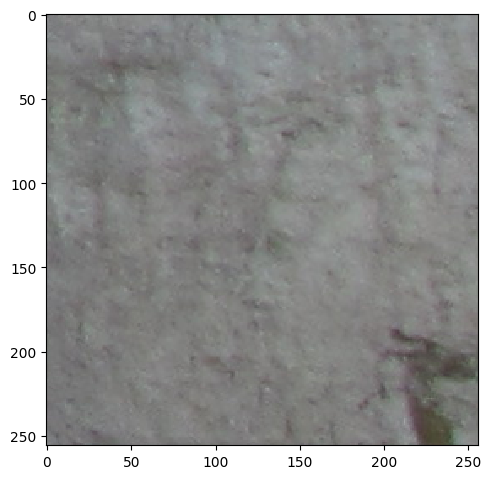

In [ ]:
# Showing the first image
plt.figure(figsize = (5,5))
io.imshow(imagen[0])

### Ground Truth computation

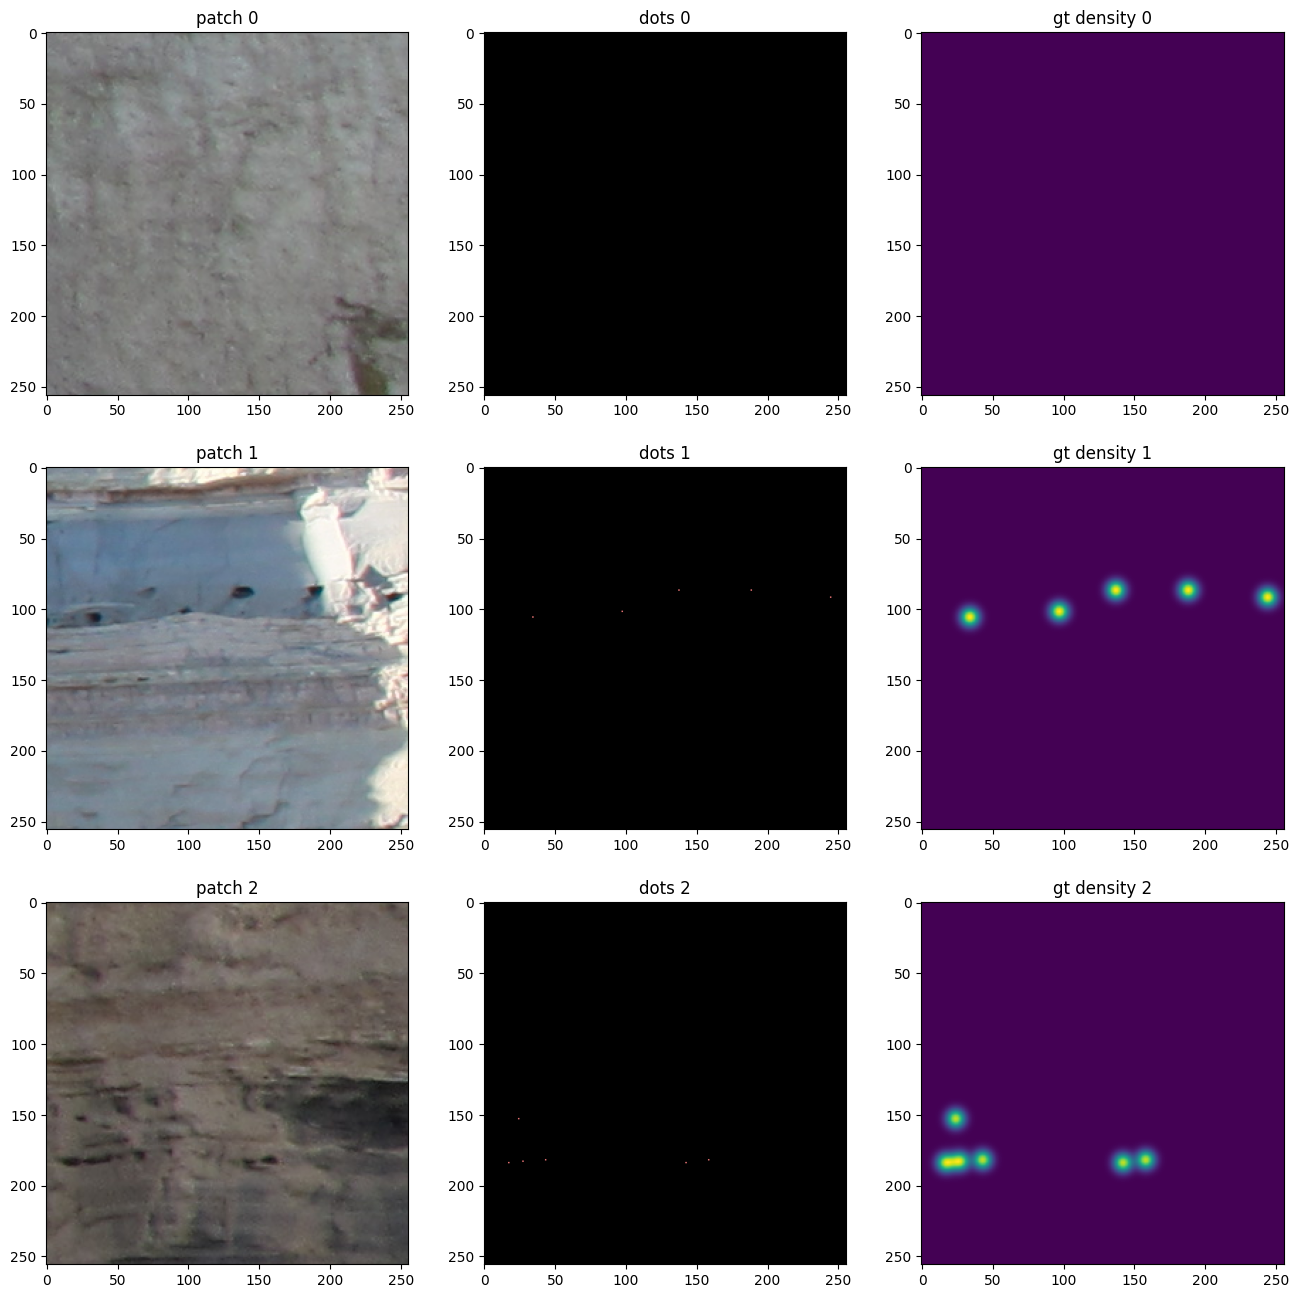

In [ ]:
# Applying the Gaussian Kernel on the points marked by the experts

from skimage.filters import gaussian

densidad_gt = np.zeros(shape=(qty,256,256))

for i in range(qty):

    densidad_gt[i,:,:] = gaussian(puntos[i][:,:,0], sigma=4.5)  # The scale of the Gaussian is a user parameter Sigma which should roughly match the object size.
                                                                # https://www.ilastik.org/documentation/counting/counting#sec_reference
                                                                # Points information in red channel [:,:,0]

# sigma = standard deviation for Gaussian kernel. The standard deviations of the Gaussian filter are given for each axis as a sequence,
# or as a single number, in which case it is equal for all axes.

fig, ax = plt.subplots(3,3, figsize=(16, 16))

# Inspecting the first 3 images:
for i in range(3):
    ax[i,0].imshow(imagen[i])
    ax[i,1].imshow(puntos[i])
    ax[i,2].imshow(densidad_gt[i])

    ax[i,0].set_title('patch ' + str(i))
    ax[i,1].set_title('dots ' + str(i))
    ax[i,2].set_title('gt density '+ str(i))

    plt.rcParams["axes.grid"] = False

plt.show()

In [ ]:
print(densidad_gt.min())
print(densidad_gt.max())

0.0
0.04827504360859346


### Selection of training and testing images

In [ ]:
# Number of training + validation images
N = 296

In [ ]:
# Training + Validation set

x_train = np.zeros(shape=(N,256,256,3))
y_train = np.zeros(shape=(N,256,256))


for i in range(N):

    x_train[i,:,:,:] = imagen[i]
    y_train[i,:,:] = densidad_gt[i]

# Testing set

inicio_test = N

rango_test = range(inicio_test, qty)
print('testing range:', rango_test)

x_test = np.zeros(shape=(qty-inicio_test,256,256,3))           # we use the 3 RGB channels
y_test = np.zeros(shape=(qty-inicio_test,256,256))

for i in rango_test:
    x_test[i-inicio_test,:,:,:]  = imagen[i]                   # we use the 3 RGB channels
    y_test[i-inicio_test,:,:]  = densidad_gt[i]

print('\n')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

testing range: range(296, 312)


(296, 256, 256, 3)
(296, 256, 256)
(16, 256, 256, 3)
(16, 256, 256)


In [ ]:
y_train.max()

0.04827504360859346

In [ ]:
# It is important to scale the density kernels from 0.0-1.0 to something higher ( in this case 0.0-255.0),
# otherwise the network struggles to learn the very small target values produced by Gaussian convolution.
# These values are down-scaled subsequently to valid densities (0.0-1.0). https://github.com/dwaithe/U-net-for-density-estimation

densidad_aum      = np.zeros(shape=(N,256,256))
densidad_aum_test = np.zeros(shape=(qty-inicio_test,256,256))

factor = 255. / y_train.max()

for i in range(N):
    densidad_aum[i] = y_train[i] * factor

# test
for i in rango_test:
    densidad_aum_test[i-inicio_test] = y_test[i-inicio_test] * factor


print(factor)
print(densidad_aum.max())


5282.23241117088
255.0


In [ ]:
# Importing libraries

from sklearn.metrics import r2_score
from tensorflow import keras
from keras import backend as K

In [ ]:
# Loss functions

def mae(y_true, y_pred):
    """
    Function to compute the loss of the neural network at the end of each epoch
    """
    return K.mean(abs(y_pred - y_true))

def rmse(y_true, y_pred):
    """
    Function to compute the loss of the neural network at the end of each epoch
    """
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Metric

def r2(y_true, y_pred):
    """
    Function that defines r2 values as metric of the neural network at the end of each epoch
    """
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


### Different Blocks

In [ ]:
def bn_act(x, act=True):
    x = keras.layers.BatchNormalization()(x)
    if act == True:
        x = keras.layers.Activation("relu")(x)
    return x

def conv_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    conv = bn_act(x)
    conv = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(conv)
    return conv

def stem(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    conv = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(x)
    conv = conv_block(conv, filters, kernel_size=kernel_size, padding=padding, strides=strides)

    shortcut = keras.layers.Conv2D(filters, kernel_size=(1, 1), padding=padding, strides=strides)(x)
    shortcut = bn_act(shortcut, act=False)

    output = keras.layers.Add()([conv, shortcut])
    return output

def residual_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    res = conv_block(x, filters, kernel_size=kernel_size, padding=padding, strides=strides)
    res = conv_block(res, filters, kernel_size=kernel_size, padding=padding, strides=1)

    shortcut = keras.layers.Conv2D(filters, kernel_size=(1, 1), padding=padding, strides=strides)(x)
    shortcut = bn_act(shortcut, act=False)

    output = keras.layers.Add()([shortcut, res])
    return output

def upsample_concat_block(x, xskip):
    u = keras.layers.UpSampling2D((2, 2))(x)
    c = keras.layers.Concatenate()([u, xskip])
    return c


### ResUNet architecture

In [ ]:
image_size = 256

def ResUNet():
    f = [64, 128, 256, 512]   # [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size, 3))

    ## Encoder
    e0 = inputs
    e1 = stem(e0, f[0])
    e2 = residual_block(e1, f[1], strides=2)
    e3 = residual_block(e2, f[2], strides=2)
    e4 = residual_block(e3, f[3], strides=2)

    ## Bridge
    b0 = conv_block(e4, f[3], strides=1)
    b1 = conv_block(b0, f[3], strides=1)

    ## Decoder
    u1 = upsample_concat_block(b1, e3)
    d1 = residual_block(u1, f[3])

    u2 = upsample_concat_block(d1, e2)
    d2 = residual_block(u2, f[2])

    u3 = upsample_concat_block(d2, e1)
    d3 = residual_block(u3, f[1])


    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="relu")(d3)
    model = keras.models.Model(inputs, outputs)
    return model


In [ ]:
model = ResUNet()
adam = keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(optimizer=adam, loss = rmse, metrics=[r2])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# Hyperparameters

NUM_EPOCHS = 40
BATCH_SIZE = 4
LOG_DIR    = BASE_FOLDER

print("Training now...")
H = model.fit(x_train, densidad_aum,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_split=0.15)

# https://github.com/keras-team/keras/issues/597
# The validation data is picked as the last 10% (for instance, if validation_split=0.9) of the input.
# The training data (the remainder) can optionally be shuffled at every epoch (shuffle argument in fit).
# That doesn't affect the validation data, obviously, it has to be the same set from epoch to epoch (François Chollet)

# Save model
print("\nSaving final model...")
model.save(LOG_DIR + 'loro_model_ResUNet.h5')


Training now...
Epoch 1/40
63/63 [==============================] - 99s 914ms/step - loss: 3.9812 - r2: -498229739520.0000 - val_loss: 4.9969 - val_r2: 0.0367
Epoch 2/40
63/63 [==============================] - 40s 635ms/step - loss: 3.6142 - r2: -500392427520.0000 - val_loss: 4.9969 - val_r2: 0.0367
Epoch 3/40
63/63 [==============================] - 40s 635ms/step - loss: 3.3723 - r2: -797550837760.0000 - val_loss: 4.9969 - val_r2: 0.0367
Epoch 4/40
63/63 [==============================] - 40s 635ms/step - loss: 3.2037 - r2: -178507169792.0000 - val_loss: 4.9969 - val_r2: 0.0367
Epoch 5/40
63/63 [==============================] - 40s 640ms/step - loss: 3.0970 - r2: -103711080448.0000 - val_loss: 4.9969 - val_r2: 0.0367
Epoch 6/40
63/63 [==============================] - 40s 637ms/step - loss: 2.9763 - r2: -590218657792.0000 - val_loss: 4.9969 - val_r2: 0.0367
Epoch 7/40
63/63 [==============================] - 40s 635ms/step - loss: 2.7788 - r2: -240060121088.0000 - val_loss: 4.9946 

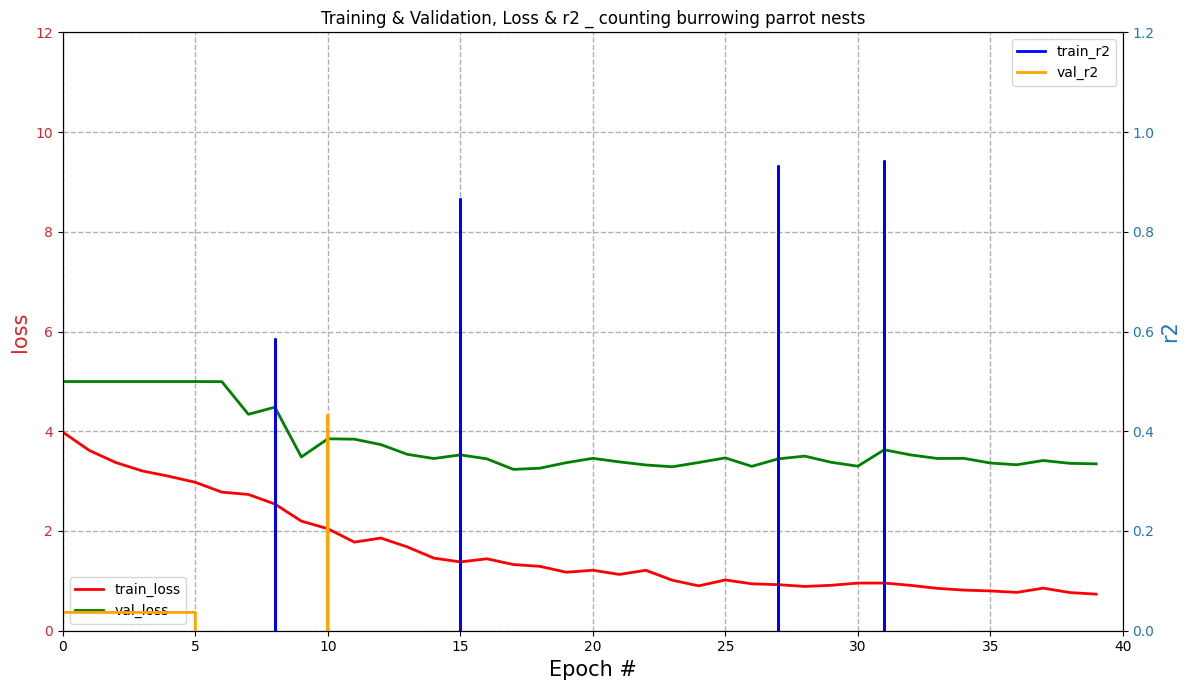

In [ ]:
# Plot

plt.rcParams["figure.figsize"] = (12,7)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch #', fontsize=15)
ax1.set_ylabel('loss', color=color, fontsize=15)
ax1.set_xlim(0, NUM_EPOCHS)
ax1.set_ylim(0, 12)
ax1.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss", c='red', linewidth='2')
ax1.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss", c='green', linewidth='2')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='dashed', linewidth='1')
ax1.legend(loc='lower left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('r2', color=color, fontsize=15)  # we already handled the x-label with ax1
ax2.set_ylim(0,1.2)
ax2.plot(np.arange(0, NUM_EPOCHS), H.history["r2"], label="train_r2", c='blue', linewidth='2')
ax2.plot(np.arange(0, NUM_EPOCHS), H.history["val_r2"], label="val_r2", c='orange', linewidth='2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title("Training & Validation, Loss & r2 _ counting burrowing parrot nests")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

### Testing the model

In [ ]:
pred = model.predict(x_test, batch_size=BATCH_SIZE)      # delivers dimensions (qty-inicio_test, 256, 256, 1)
pred_ = np.squeeze(pred, axis=3)

print(N)
print(pred.shape)
print(pred_.shape)

4/4 [==============================] - 1s 217ms/step
296
(16, 256, 256, 1)
(16, 256, 256)


In [ ]:
lista_test = []

for i in rango_test:

    lista_test.append( r2_score(densidad_aum_test[i-inicio_test], pred_[i-inicio_test]))
    print('\nr2_score test image #',i,'=', r2_score(densidad_aum_test[i-inicio_test], pred_[i-inicio_test]))

print('\n\n############  mean testing r2_score = %.2f' %np.mean(lista_test) + '  ############')


r2_score test image # 296 = 0.5078125

r2_score test image # 297 = 0.4453125

r2_score test image # 298 = -13.73466981834063

r2_score test image # 299 = -5.226146418651004

r2_score test image # 300 = 0.63671875

r2_score test image # 301 = 0.515625

r2_score test image # 302 = 0.6155180657068553

r2_score test image # 303 = -780.4113724545173

r2_score test image # 304 = 0.77734375

r2_score test image # 305 = 0.07421875

r2_score test image # 306 = -469.2185049922906

r2_score test image # 307 = 0.62109375

r2_score test image # 308 = 0.26953125

r2_score test image # 309 = 0.5165082821311879

r2_score test image # 310 = 0.49609375

r2_score test image # 311 = -36.35617201984521


############  mean testing r2_score = -81.22  ############


### CNN Residual Unet gives us artificial density maps, we visualize them

In [ ]:
# First we de-scale the density maps to correct values, using the factor we had saved for it.

dens_pred_descaled = pred_ / factor

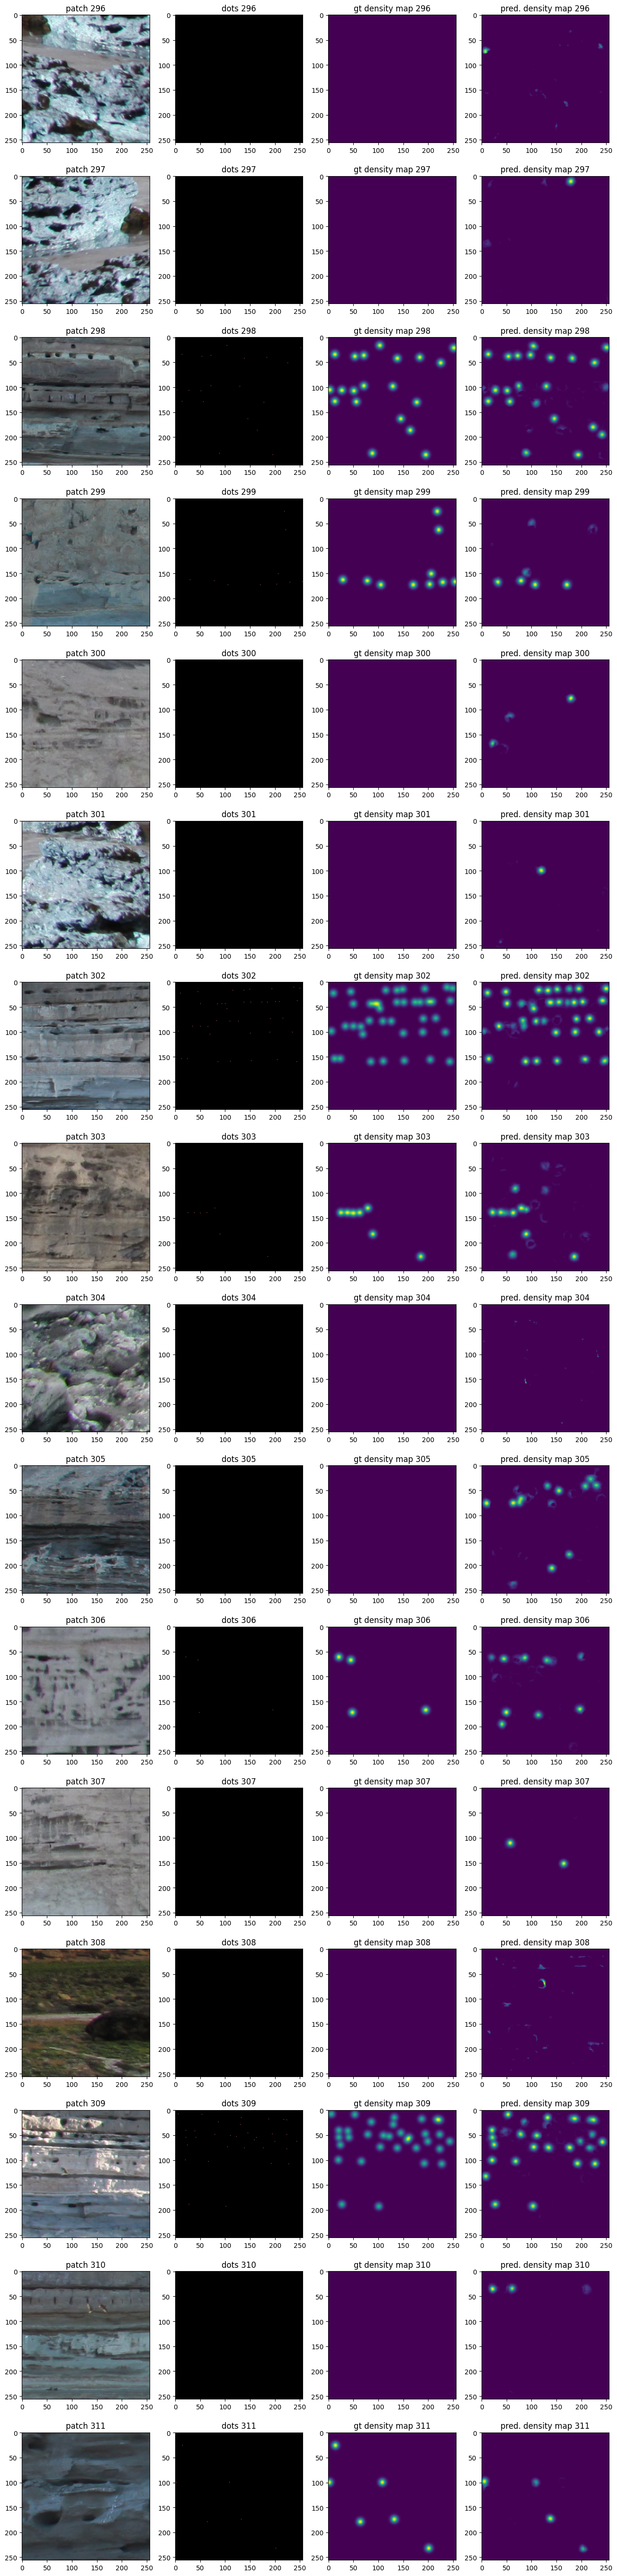

In [ ]:
fig, ax = plt.subplots(qty-N,4, figsize=(16, 70))

for i in range(N, qty):

    ax[i-N, 0].imshow(imagen[i])
    ax[i-N, 1].imshow(puntos[i])
    ax[i-N, 2].imshow(densidad_gt[i])
    ax[i-N, 3].imshow(dens_pred_descaled[i-N])


    ax[i-N, 0].set_title('patch '  + str(i))
    ax[i-N, 1].set_title('dots ' + str(i))
    ax[i-N, 2].set_title('gt density map '+ str(i))
    ax[i-N, 3].set_title('pred. density map '+ str(i))

plt.show()

## Counting the objects



In [ ]:
print(rango_test)

range(296, 312)


In [ ]:
# We show object counts over the real image, ground truth (density through Gaussian kernel),
# count over the density map estimated through the CNN model, and Error. We do it on the test images.

error = []
error_porcentual = []
error_absoluto = []

for i in rango_test:

    real     = puntos[i][:,:,0].sum()
    gt       = densidad_gt[i].sum()
    estimado = dens_pred_descaled[i-inicio_test].sum()

    print('\nActual count image %d                 = ' %i +  '%.0f' %real)
    print('Estimated count image %d              ='%i + ' %.0f' %estimado)
    error.append(estimado - real)


    error_absoluto.append(abs(estimado - real))
    print('Error (estimated vs actual)            = %.1f' %(estimado - real))


    error_porcentual.append( 100.*abs(estimado - real) / real)
    print('Percentage Error (estimated vs actual) = %.2f' %(100.*(estimado - real) / real) + '%')

print('\n\n######## Mean Absolute Error = %.1f' %(sum(error_absoluto)/len(rango_test)) + ' #######')
print('\n######## Percentage Mean Absolute Error = %.1f' %(sum(error_porcentual)/len(rango_test)) + '%' + ' #######' )

print('\n######## Maximum Absolute Error = %.1f' %max(error_absoluto) + ' #######')


Actual count image 296                 = 0
Estimated count image 296              = 0
Error (estimated vs actual)            = 0.3
Percentage Error (estimated vs actual) = inf%

Actual count image 297                 = 0
Estimated count image 297              = 1
Error (estimated vs actual)            = 1.2
Percentage Error (estimated vs actual) = inf%

Actual count image 298                 = 20
Estimated count image 298              = 20
Error (estimated vs actual)            = 0.2
Percentage Error (estimated vs actual) = 0.92%

Actual count image 299                 = 10
Estimated count image 299              = 5
Error (estimated vs actual)            = -5.2
Percentage Error (estimated vs actual) = -51.65%

Actual count image 300                 = 0
Estimated count image 300              = 1
Error (estimated vs actual)            = 1.1
Percentage Error (estimated vs actual) = inf%

Actual count image 301                 = 0
Estimated count image 301              = 1
Error (estimate

<ipython-input-24-25a474a73647>:23: RuntimeWarning: divide by zero encountered in double_scalars
  error_porcentual.append( 100.*abs(estimado - real) / real)
<ipython-input-24-25a474a73647>:24: RuntimeWarning: divide by zero encountered in double_scalars
  print('Percentage Error (estimated vs actual) = %.2f' %(100.*(estimado - real) / real) + '%')
